Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋이다.

이 데이터셋은 미국에서 수집된 임금에 대한 정보를 포함하고 있다.

In [95]:
from pandas import read_excel, pivot_table, crosstab
import seaborn as sb
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [57]:
df = read_excel("https://data.hossam.kr/D02/wage.xlsx")
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [8]:
df.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [11]:
# df = df.astype({'maritl' : 'category', 'race': 'category', 'education': 'category', 'region': 'category', 'jobclass': 'category','health': 'category', 'health_ins': 'category'})

In [58]:
df.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [13]:
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


이 데이터는 미국에서 2003년부터 2008년까지의 3000개의 임금수준을 보여준다. 데이터 셋의 표본의 평균 나이는 약 42세이고 가장 나이가 많은 사람은 80세 가장 나이가 어린 근로자는 18세이다. 가장 높은 수준의 급여는 318달러이고 가장 낮은 수준의 급여는 20달러 그리고 가장 많이 받는 급여는 약 105불이다. 임금의 표준편차가 41.72인 것을 보아 임금의 표준편차가 큰 것을 확인할 수 있다.

In [17]:
df['maritl'].value_counts()

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64

In [18]:
# vc = df['maritl'].value_counts()
# vc

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64

In [20]:
df_1 = df[['maritl','wage']]
df_1[df['maritl']== "1. Never Married"]

,maritl,wage
0,1. Never Married,75.043154
1,1. Never Married,70.476020
7,1. Never Married,111.720849
8,1. Never Married,118.884359
12,1. Never Married,89.492480
...,...,...
2972,1. Never Married,87.981033
2976,1. Never Married,59.097064
2989,1. Never Married,148.413159
2991,1. Never Married,118.884359


In [22]:
# vlist = list(vc.index)
# vlist

['2. Married', '1. Never Married', '4. Divorced', '5. Separated', '3. Widowed']

In [23]:
# conditions = [
#     (df['maritl'] == vlist[0]),
#     (df['maritl'] == vlist[1]),
#     (df['maritl'] == vlist[2]),
#     (df['maritl'] == vlist[3]),
#     (df['maritl'] == vlist[4]),
# ]

# value = [2,1,4,5,3]

# df['maritl'] = np.select(conditions,value)
# df['maritl']

0       1
1       1
2       2
3       2
4       4
       ..
2995    2
2996    2
2997    2
2998    1
2999    5
Name: maritl, Length: 3000, dtype: int32

In [62]:
ilist = df.dtypes.index
ilist

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [63]:
vlist = df.dtypes.values
vlist

array([dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64')], dtype=object)

#### 범용적인 경우를 고려한 코드

In [64]:
cdf = df.copy()
for i, v in enumerate(vlist):
    if v == 'object':
        field_name = ilist[i]
        # 값의 종류별로 빈도를 카운트 한 후 인덱스 이름으로 정렬
        vc = cdf[field_name].value_counts().sort_index()
        for ii, vv in enumerate(list(vc.index)):
            # 일련번호 값 생성
            vnum = ii +1
            print(vv, " --> ", vnum)

            #일련 번호 값 치환
            cdf.loc[cdf[field_name] == vv, field_name] = vnum
        cdf[field_name] = cdf[field_name].astype('category')
        print(("---" * 10))

1. Never Married  -->  1
2. Married  -->  2
3. Widowed  -->  3
4. Divorced  -->  4
5. Separated  -->  5
------------------------------
1. White  -->  1
2. Black  -->  2
3. Asian  -->  3
4. Other  -->  4
------------------------------
1. < HS Grad  -->  1
2. HS Grad  -->  2
3. Some College  -->  3
4. College Grad  -->  4
5. Advanced Degree  -->  5
------------------------------
2. Middle Atlantic  -->  1
------------------------------
1. Industrial  -->  1
2. Information  -->  2
------------------------------
1. <=Good  -->  1
2. >=Very Good  -->  2
------------------------------
1. Yes  -->  1
2. No  -->  2
------------------------------


In [65]:
cdf

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,1,1,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,1,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,1,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,1,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,1,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,1,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,1,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,1,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,1,1,2,1,4.477121,87.981033


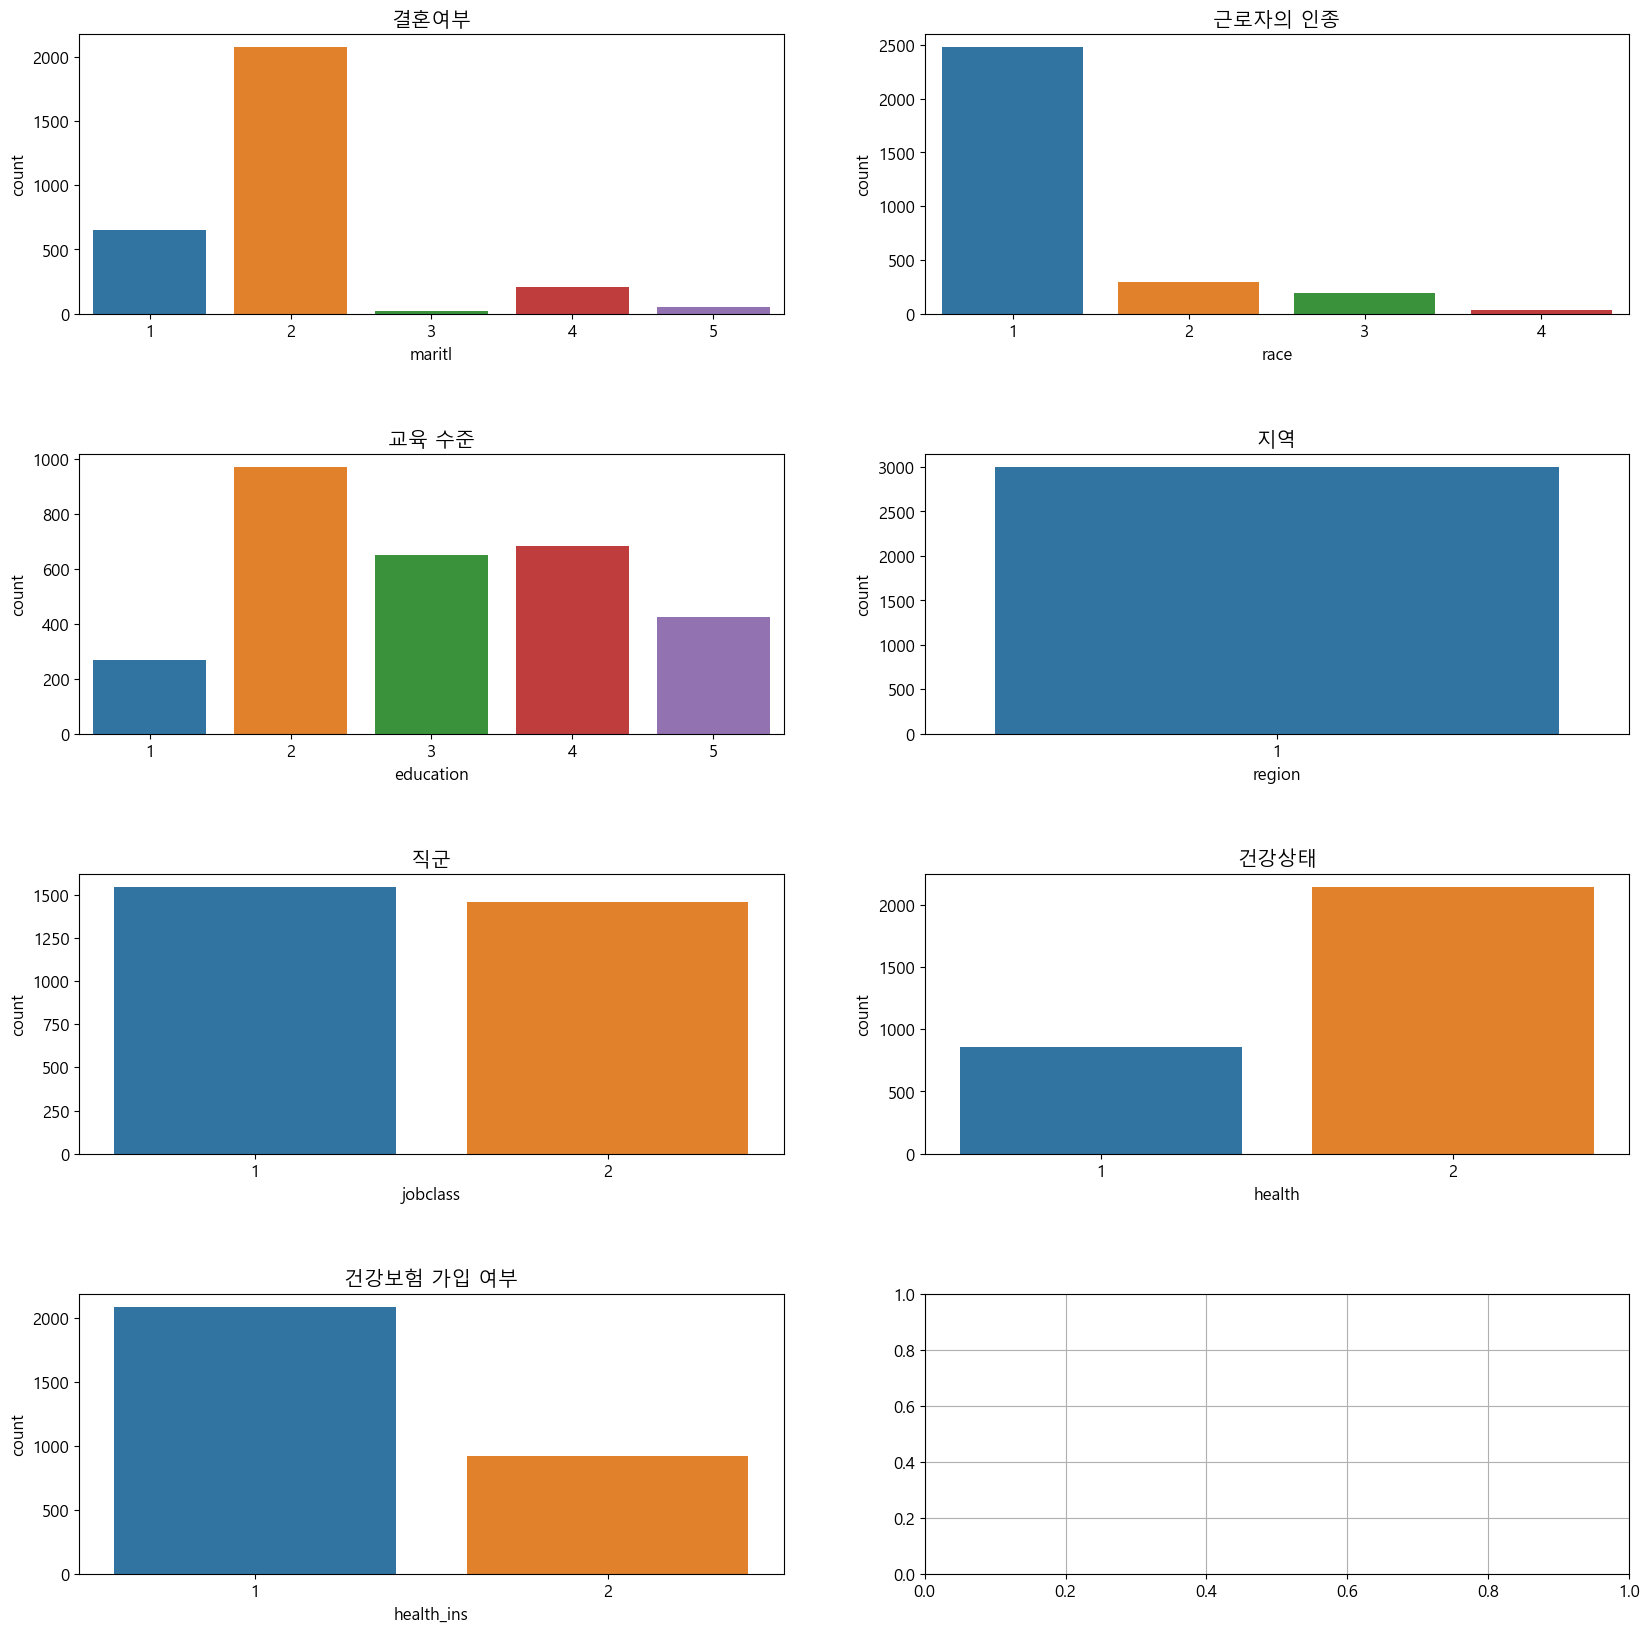

In [66]:
plt.rcParams["figure.figsize"] = (20, 20)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2)
fig.subplots_adjust(hspace=0.5)

sb.countplot(data=cdf,x='maritl', ax = ax1)
ax1.title.set_text('결혼여부')

sb.countplot(data=cdf, x='race', ax = ax2)
ax2.title.set_text('근로자의 인종')

sb.countplot(data=cdf, x='education', ax = ax3)
ax3.title.set_text('교육 수준')

sb.countplot(data=cdf, x='region', ax = ax4)
ax4.title.set_text('지역')

sb.countplot(data=cdf, x='jobclass', ax = ax5)
ax5.title.set_text('직군')

sb.countplot(data=cdf, x='health', ax = ax6)
ax6.title.set_text('건강상태')

sb.countplot(data=cdf, x='health_ins', ax = ax7)
ax7.title.set_text('건강보험 가입 여부')

plt.grid()
plt.show()
plt.close()

1. 결혼여부에서 결혼을 한 인원이 2000명으로 전체 인원의 2/3가 결혼했음을 알 수 있다.
2. 인종 그래프에서 백인이 약 2500으로 가장 대다수의 인종을 차지하고 그 뒤로 흑인과 아시안이 상대적으로 굉장히 적은 인원으로 인종 구성을 하고 있음을 알 수 있다.
3. 교육수준에서 우리는 가장 많은 인원이 고등학교 졸업자이고 그 다음으로 대학교 졸업자, 대학교 재학자, 상위 학위 수여자 가장 적은 비율이 고등학교 중퇴 이하라는 사실을 확인할 수 있다. 따라서 90퍼센트 이상이 고등학교 졸업자 이며, 60프로 이상이 대학교 재학 또는 대학 졸업자이다.
4. 전원 middle atlantic에서 왔다.
5. 절반은 Indstrurial 필드에서 일하고 나머지 반은 Information 필드에서 일한다.
6. 건강사태가 매우 좋은 상태의 인원이 70퍼 이상이며, 좋지 않은 인원은 약 800명 정도로 확인된다.
7. 건강보험을 현재 가입한 인원이 그렇지 않은 인원의 2배 이상입니다.

결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.



In [53]:
bins_list = [0, 50, 100, 150, 200, 250,300,350]


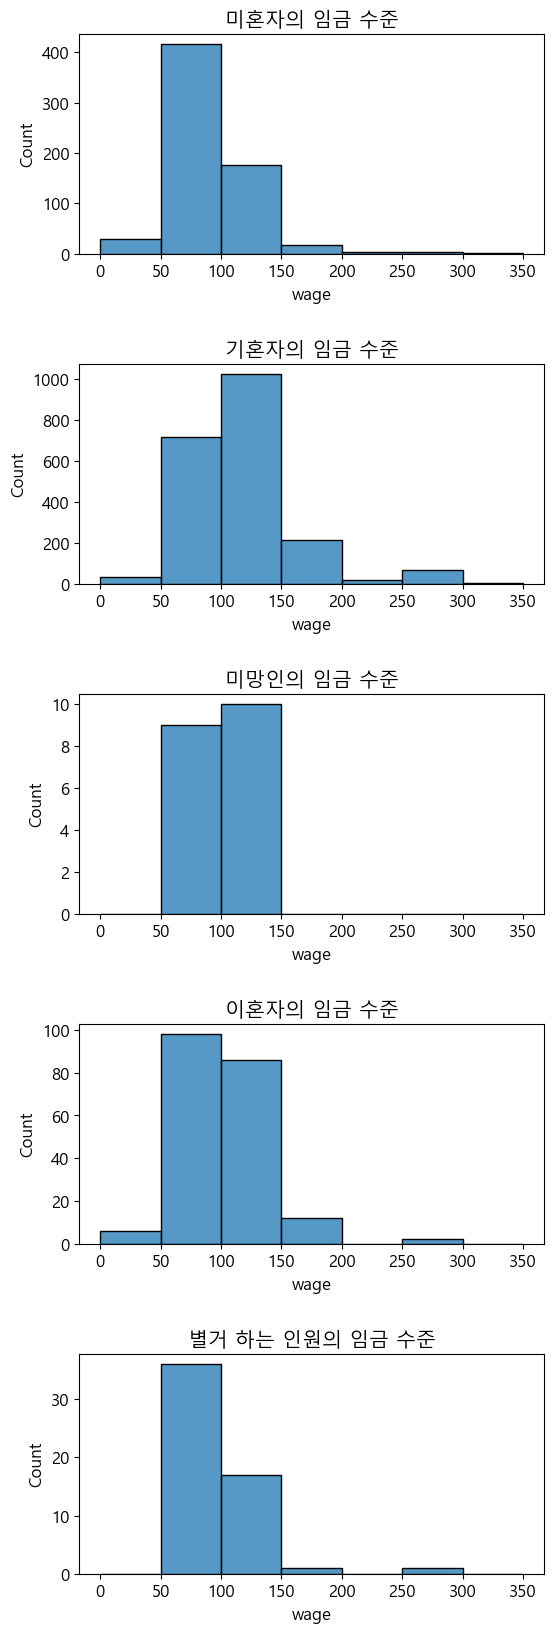

<Figure size 600x2000 with 0 Axes>

In [68]:
plt.rcParams["figure.figsize"] = (6, 20)
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(5,1)
fig.subplots_adjust(hspace=0.5)
plt.figure()
sb.histplot(data = cdf[cdf['maritl']== 1], x = 'wage', bins = bins_list, ax=)
ax1.title.set_text('미혼자의 임금 수준')
sb.histplot(data = cdf[cdf['maritl'] == 2], x = 'wage', bins = bins_list, ax = ax2)
ax2.title.set_text('기혼자의 임금 수준')
sb.histplot(data = cdf[cdf['maritl'] == 3], x = 'wage', bins = bins_list,  ax = ax3)
ax3.title.set_text('미망인의 임금 수준')
sb.histplot(data = cdf[cdf['maritl'] == 4], x = 'wage', bins = bins_list, ax = ax4)
ax4.title.set_text('이혼자의 임금 수준')
sb.histplot(data = cdf[cdf['maritl'] == 5], x = 'wage', bins = bins_list, ax = ax5)
ax5.title.set_text('별거 하는 인원의 임금 수준')

plt.show()
plt.close()



위 도표를 확인하였을 떄 미혼 인원이 50~100을 받는 비율이 가장 많았고 기혼 인원은 100~150을 받는 경우가 가장 많은 것을 알 수 있었다. 그러나 기혼자가 이혼을 하거나 별거할 경우 50~100을 받는 비율이 높아지는 것을 보아 결혼 생활의 안정성이 임금수준에 영향을 주는지 다른 방법을 통해 재차 확인해 볼 필요가 있다.

6. 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

In [85]:
education = sorted(list(df['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

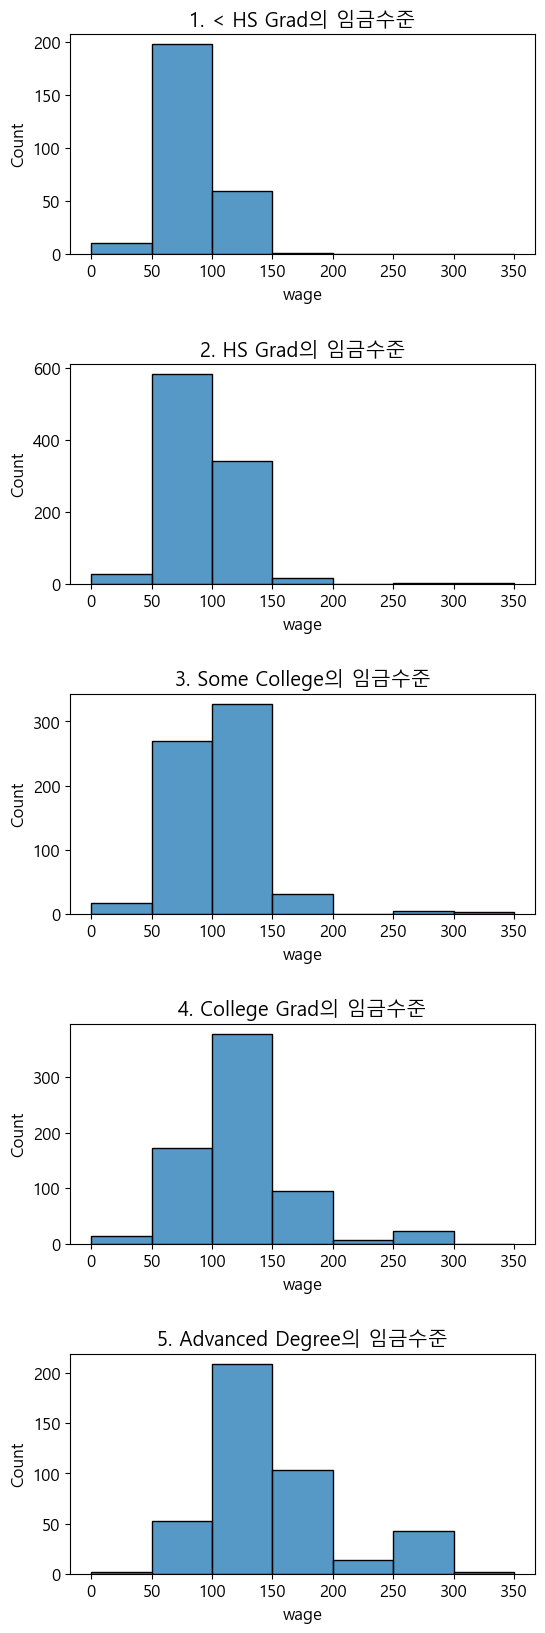

<Figure size 600x2000 with 0 Axes>

In [87]:
# 자동화
plt.rcParams["figure.figsize"] = (6, 20)
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(5,1)
fig.subplots_adjust(hspace=0.5)
plt.figure()
axlist = [ax1,ax2,ax3,ax4,ax5]
for i in range(1,6):
    sb.histplot(data= cdf[cdf['education'] == i], x= 'wage', bins = bins_list, ax = axlist[i-1])
    axlist[i-1].title.set_text('%s의 임금수준' % education[i-1])

plt.show()
plt.close()



고등학교 중퇴 이하자는 대부분 50~100 사이의 임금을 수령하고 200 이상의 임금을 받는 인원이 없다.
고등학교 졸업자 역시 대부분 50~100 사이의 임금을 수령하고 100~150 사이의 임금을 받는 비율이 고등학교 중퇴 이하보다 늘어났다.
대학 재학생들은 100~150 사이의 임금을 받는 비율이 더 높다.
대학 졸업자들은 대부분 100~150의 임금을 받으며 150~200 사이의 임금을 받는 비율이 비교적 높아졌다.
석사 학력이상의 노동자들은 150~200 사이의 임금을 받는 비율이 50~100 사이의 임금을 받는 인원보다 더 높고 250~300 사이의 임금을 받는 비율이 비율적으로 높아졌다.

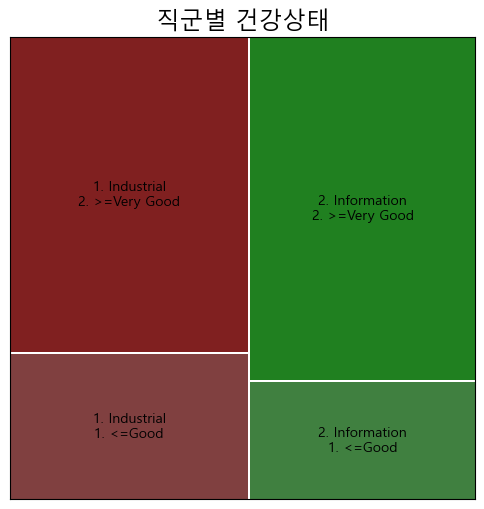

In [89]:
plt.rcParams["figure.figsize"] = (6, 6)

mosaic(df, ['jobclass', 'health'], axes_label=False)

plt.title('직군별 건강상태', fontsize= 17)
plt.show()
plt.close()


두 직군에서 모두 건강한 비율이 더 높지만 Information 직군에 종사하는 인원들이 Industrial 직군에서 종사하는 인원들보다 비율적으로 더 좋은 건강상태를 유지하고 있는 비율이 높다.

교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [90]:
df['race']

0       1. White
1       1. White
2       1. White
3       3. Asian
4       1. White
          ...   
2995    1. White
2996    1. White
2997    2. Black
2998    1. White
2999    1. White
Name: race, Length: 3000, dtype: object

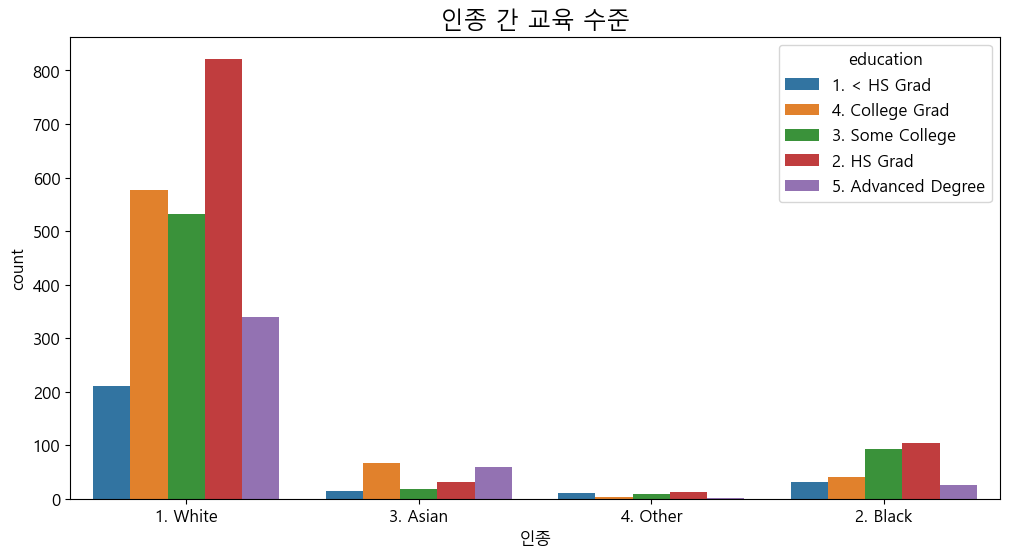

In [99]:
plt.rcParams["figure.figsize"] = (12,6)

sb.countplot(data=df,x= df['race'], hue = df['education'] )

plt.title('인종 간 교육 수준', fontsize= 17)
plt.xlabel('인종')
plt.show()
plt.close()


먼저 백인은 고등학교 졸업자가 비율적으로 가장 많고 그 뒤를 대학교 졸업자가 따른다. 그리고 대학 졸업이상인 비율이 고등학교 중퇴 이하자보다 더 많은 것을 알 수 있다.
흑인종에서는 마찬가지로 고등학교 졸업자가 많지만 그 뒤를 대학교 재학자가 따르고 있음을 확인할 수 있고 그 대학 졸업 이상의 비율보다 고등학교 중퇴자가 더 많은 것을 확인 할 수 있다.
아시아인은 대학졸업자가 비율적으로 가장 많고 그 뒤를 석사 이상 학위를 갖고 있는 비율이 많은 것을 확인할 수 있다. 고등학교 중퇴자 이하의 학력을 가진 인원이 가장 적다.
다른 인종에서는 각 학력이 두드러진 차이를 내지 않는다.

#### 직군과 건강상태의 비율 조사.

In [94]:
hdf = cdf.filter(['jobclass','health'])
hdf

,jobclass,health
0,1,1
1,2,2
2,1,1
3,2,2
4,2,1
...,...,...
2995,1,2
2996,1,2
2997,1,1
2998,1,2


In [96]:
crosstab(index=hdf['jobclass'], columns = hdf['health'],
         rownames=['직군'], colnames= ['건강상태'], margins=True)

건강상태,1,2,All
직군,,,
1,487,1057,1544
2,371,1085,1456
All,858,2142,3000
